Ik heb de opdracht 'hardcoded' uitgewerkt, inclusief uitleg berekeningen. De code is dus niet herbruikbaar. Ik had ook met classes of meer functies kunnen werken, maar ik vond dit duidelijker en overzichtelijker. Om meer geplotte data te tonen, kan variabele limit vergroot worden.

In [1]:
import matplotlib.pyplot as plt # for plotting graphs
from matplotlib import style
style.use('ggplot') # om rasters te creeren en zo punten beter af te kunnen lezen
plt.rcParams['figure.figsize'] = [14,7] # set size of graphs

__Snelheden a.d.h.v. posities__

Sla eerst alle posities op in lijsten:

In [2]:
time , car1_positions , car2_positions = [] , [] , []
csv = open('verkeerssimulatie-rechteweg-posities.csv', 'r')
for row in csv: # iterate over csv file to save all values from the columns into lists
    time.append(float(row.split(";")[0])) # first column is time
    car1_positions.append(float(row.split(";")[1])) # second column filled with positions of car 1
    car2_positions.append(float(row.split(";")[2])) # third column filled with positions of car 2
csv.close()

Haal eerste positie van beide auto's op:

In [3]:
position_1 = car1_positions[0] # set first position
position_2 = car2_positions[0] # set first position

Bereken snelheden auto's:

Snelheid wordt per auto berekend. Er wordt steeds naar het verschil in afstand gekeken tussen huidige en volgende positie. Afgelegde afstand tussen deze 2 posities wordt gedeeld door de verstreken tijd. Uitkomst van deze som is de snelheid van de auto. ($\Delta$ staat voor verschil tussen...)<br><br>
$\dfrac{\Delta positie}{\Delta tijd}$ = $\dfrac{huidige\,positie - vorige\,positie}{huidige\,tijd - laatste\,tijd}$<br>

Omdat $\Delta tijd$ altijd 0.1 is, hoef ik hier geen berekening voor uit te voeren.<br>

De berekeningen voor de snelheid van de auto's over tijd wordt met een afgeleide berekend. Om de afgeleide te kunnen berekenen wordt een lineaire benadering gebruikt. Om de meest nauwkeurige resultaten te krijgen wordt het tijdsinterval zo klein mogelijk gemaakt (zo dicht mogelijk bij nul). Om de afgeleide te kunnen berekenen wordt ervan uitgegaan dat de posities van de auto constant zijn over tijd (in het tijdsinterval). Dit is waarschijnlijk niet het geval, maar dit is wel nodig voor de berekening. De zeer waarschijnlijk niet lineaire toename, wordt daardoor wel lineair benaderd. Het berekenen van de afgeleide zal dus nooit exact zijn hoe de auto werkelijk reed. Je wilt dus steeds zo klein mogelijk stukjes berekenen over tijd.

Alle snelheden worden per auto aan een lijst toegevoegd. Deze lijst wordt gebruikt om de data te plotten met tijdsverloop.

In [4]:
car1_speeds, car2_speeds = [], []
for i in range(1, len(time)):
        
    distance1 = car1_positions[i] - position_1 # calculate traveled distance
    distance2 = car2_positions[i] - position_2 # calculate traveled distance
    
    speed1 = distance1 / 0.1 # dividing distance by time interval to calculate speed
    speed2 = distance2 / 0.1 # dividing distance by time interval to calculate speed

    car1_speeds.append(speed1) # save speed to list    
    car2_speeds.append(speed2) # save speed to list  

    position_1 = car1_positions[i] # set current position for next 'last position'
    position_2 = car2_positions[i] # set current position for next 'last position'

Print max en min snelheden beide auto's door simpelweg de max en min functie op de lijsten met snelheden toe te passen:

In [5]:
print("Min snelheid auto 1: ", min(car1_speeds))
print("Max snelheid auto 1: ", max(car1_speeds))
print("Min snelheid auto 2: ", min(car2_speeds))
print("Max snelheid auto 2: ", max(car2_speeds))

Min snelheid auto 1:  1.269999999999527
Max snelheid auto 1:  6.3500000000004775
Min snelheid auto 2:  0.0
Max snelheid auto 2:  2.0000000000000284


Plot snelheden door tijd heen:

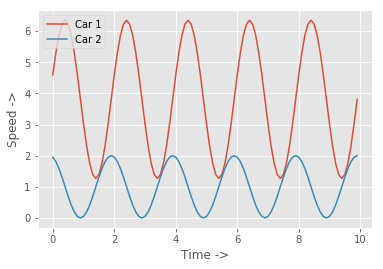

In [6]:
limit = 100 # limit is x number of values are shown, all is len(car1_speeds)
plt.xlabel('Time ->')
plt.ylabel('Speed ->')
plt.plot(time[:limit], car1_speeds[:limit], label='Car 1') # plot speed along time
plt.plot(time[:limit], car2_speeds[:limit], label='Car 2') # plot speed along time
plt.legend(loc='upper left')
plt.show()

__Posities adhv snelheid & Botsing Berekening__

In [7]:
# function for calculating collisions between cars
def get_collisions(p1, p2, p3):
    collision = []
    state = False
    if abs(p1 - p2) <= 2: # abs converts negatives into positives, and leaves positives unchanged
        collision.append(["Car 1","Car 2"])
        state = True
    if abs(p1 - p3) <= 2:
        collision.append(["Car 1", "Car 3"])
        state = True
    if abs(p2 - p3) <= 2:
        collision.append(["Car 2","Car 3"])
        state = True
    return state, collision

Sla eerst alle snelheden op in lijsten:

In [8]:
time , car1_speeds , car2_speeds, car3_speeds = [] , [] , [], []
csv = open('verkeerssimulatie-rechteweg-snelheden.csv', 'r') # open csv file
for row in csv: # iterate over csv file to save all values from the columns into lists
    time.append(float(row.split(";")[0])) # first column is time
    car1_speeds.append(float(row.split(";")[1])) # second column speed
    car2_speeds.append(float(row.split(";")[2])) # third column speed
    car3_speeds.append(float(row.split(";")[3])) # fourth column speed
csv.close() 

Eerste waarde uit lijsten snelheden is huidige positie auto's.<br>
Tweede waarde uit lijsten snelheden is huidige snelheid auto's.<br>

In [9]:
position1 = car1_speeds[0] # first row are position values
position2 = car2_speeds[0] # first row are position values
position3 = car3_speeds[0] # first row are position values
time.remove(0)# remove first value from row with position instead of speed values

Bereken posities van auto's met eerste positie en snelheid gegeven:<br>

$afgelegde\,afstand = snelheid * tijd$<br>

$huidige\,positie = laatste\,positie + afgelegd\,afstand$<br>

Voor het berekenen van de posities van de auto's over tijd wordt riemann sum gebruikt. Met Riemann sum wordt een oppervlakte onder de curve van de grafiek berekend. Deze oppervlakte wordt voor elk tijdsinterval berekend.

Controleer op botsingen:<br>
Controleren op botsingen wordt gedaan door de functie get_collisions. 
Omdat ik de opdracht puur functioneel heb uitgewerkt is het controleren op botsingen tussen de 3 auto's 'hardcoded'. Volgende stappen worden uitgevoerd bij het controleren op botsingen:<br>

- De positie van elke mogelijke combinatie van 2 auto's wordt van elkaar afgetrokken $(p1-p2, p1-p3, p2-p3)$<br>
- Als de uitkomst negatief is, wordt deze positief gemaakt door $uitkomst\cdot -1$<br.
- Als uitkomst kleiner of gelijk aan 2 is (lengte auto), betekent het een botsing.<br>

In [10]:
car1_positions, car2_positions, car3_positions = [position1], [position2], [position3]
collisions = {}
for i in range(1, len(time)):
    newposition1 = position1 + (car1_speeds[i] * 0.1) # add previous position to calculated distance
    newposition2 = position2 + (car2_speeds[i] * 0.1) # add previous position to calculated distance
    newposition3 = position3 + (car3_speeds[i] * 0.1) # add previous position to calculated distance
                                 
    car1_positions.append(newposition1) # add position to list
    car2_positions.append(newposition2) # add position to list
    car3_positions.append(newposition3) # add position to list
    
    position1 = newposition1 # save current position as 'last position'
    position2 = newposition2 # save current position as 'last position'
    position3 = newposition3 # save current position as 'last position'
    
    check_collision = get_collisions(position1, position2, position3) # check if collisions occur
    if check_collision[0]: # if check_collission[0] returns True
        collisions["At time "+str(time[i])] = check_collision[1] # add collision cars and time to dict collisions

Plot posities door tijd heen en print tijden en auto's mogelijk botsingen:

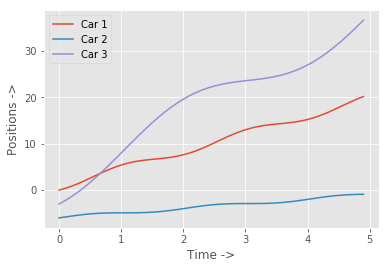

Collisions:

At time 0.3 [['Car 1', 'Car 3']] 

At time 0.4 [['Car 1', 'Car 3']] 

At time 0.5 [['Car 1', 'Car 3']] 

At time 0.6 [['Car 1', 'Car 3']] 

At time 0.7 [['Car 1', 'Car 3']] 

At time 0.8 [['Car 1', 'Car 3']] 

At time 0.9 [['Car 1', 'Car 3']] 



In [11]:
limit = 50 #imit is x number of values are shown, all is len(car1_positions)
plt.xlabel('Time ->')
plt.ylabel('Positions ->')
plt.plot(time[:limit], car1_positions[:limit], label='Car 1') # plot positions along time for length limit
plt.plot(time[:limit], car2_positions[:limit], label='Car 2') # plot positions along time for length limit
plt.plot(time[:limit], car3_positions[:limit], label='Car 3') # plot positions along time for length limit
plt.legend(loc='upper left')
plt.show()

# print all collisions incl. time and cars
print("Collisions:\n")
for i in collisions: 
    print(i, collisions[i],'\n')